In [1]:
#Step 1 – Load and Prepare the Dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 5000   # Vocabulary size (top 5,000 most frequent words)
maxlen = 500          # Pad or trim all reviews to length 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print("Training samples:", len(x_train))
print("Testing samples :", len(x_test))

# Pad sequences so all reviews are of equal length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

print("x_train shape:", x_train.shape)
print("x_test  shape:", x_test.shape)

Training samples: 25000
Testing samples : 25000
x_train shape: (25000, 500)
x_test  shape: (25000, 500)


In [3]:
#Step 2 – Build the LSTM Model
from tensorflow import keras
from tensorflow.keras import layers

model_lstm = keras.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128),  
    layers.LSTM(100),                                          
    layers.Dense(1, activation='sigmoid')
])

model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Step 3 – Compile the Model
model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
#Step 4 – Train the Model
history_lstm = model_lstm.fit(
    x_train, y_train,
    batch_size=64,
    epochs=2,
    validation_data=(x_test, y_test)
)

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 416s 1s/step - accuracy: 0.7962 - loss: 0.4316 - val_accuracy: 0.8743 - val_loss: 0.3036
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.8366 - loss: 0.3731 - val_accuracy: 0.8673 - val_loss: 0.3293


In [11]:
#Step 5 – Evaluate the Model
test_loss, test_acc = model_lstm.evaluate(x_test, y_test, verbose=2)
print(f"\nLSTM Test Accuracy: {test_acc:.4f}")

782/782 - 80s - 103ms/step - accuracy: 0.8673 - loss: 0.3293

LSTM Test Accuracy: 0.8673


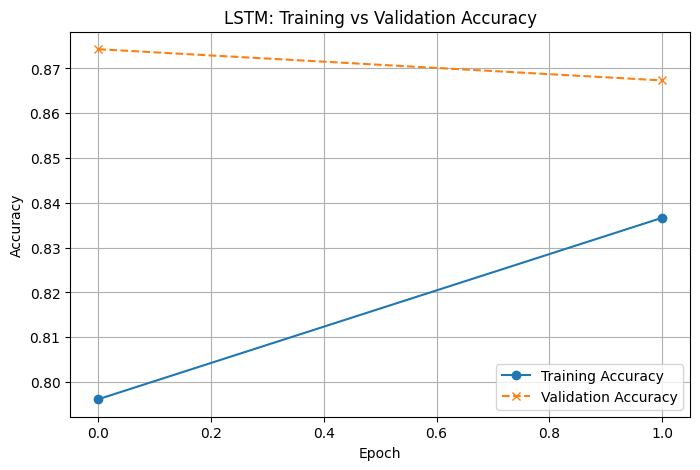

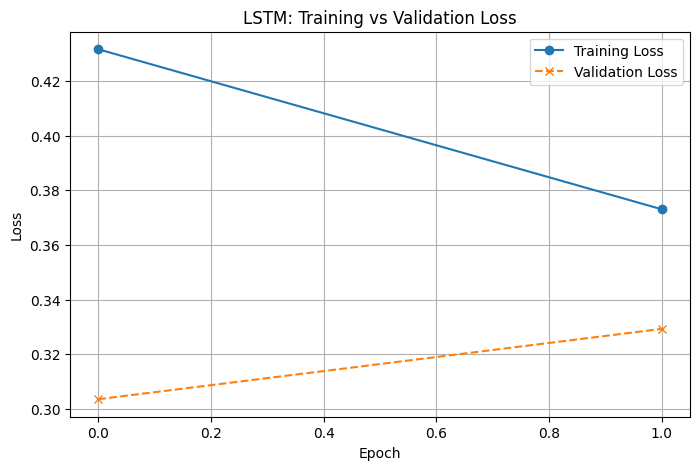

In [12]:
#Step 6 – Plot Training vs Validation Curves
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.title('LSTM: Training vs Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True); plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['loss'], label='Training Loss', marker='o')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.title('LSTM: Training vs Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(); plt.grid(True); plt.show()